#backbone_training

###load_lib_data

In [26]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [27]:
# Data Augumentation.
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),  # crop image at random and resizes it to 224.
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [28]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,
                                        transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True,
                                        transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [29]:
num_classes = 10
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [30]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
0


In [31]:
def imshow(img, title):
    npimg = img.numpy() / 2 + 0.5 # converting the image to to numpy and un-normalise it.
    plt.figure(figsize=(batch_size, 1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [32]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

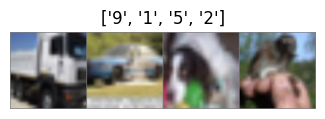

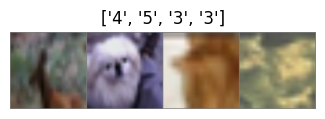

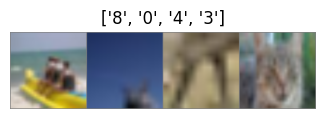

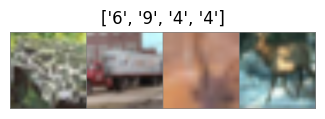

In [33]:
for i in range(4):
    show_batch_images(trainloader)

###train

In [34]:
class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.layer0 = nn.Sequential(
            nn.Conv2d(3, 3, kernel_size=1, stride=1, padding=1),
            nn.BatchNorm2d(3),
            nn.ReLU())
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(7*7*512, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))

    def forward(self, x):
        out = self.layer0(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [35]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [36]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [37]:
vgg = VGG16(num_classes=num_classes)
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

In [ ]:
%%time
loss_epoch_arr = []
max_epochs = 1
clip_value = 5

n_iters = np.ceil(50000/batch_size)

for epoch in tqdm(range(max_epochs)):
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(vgg.parameters(), clip_value)
        opt.step()

        # below steps ensures that the memory usage in the GPU is optimised.
        del inputs, labels, outputs
        torch.cuda.empty_cache()

        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))

    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs,
        evaluation(testloader, vgg), evaluation(trainloader, vgg)))

In [39]:
# Save the model
torch.save(vgg.state_dict(), 'saved_model.pth')

In [ ]:
# Reload the modelSimpleModel
vgg = VGG16(num_classes=num_classes)
vgg.load_state_dict(torch.load('saved_model.pth'))
vgg.eval()

#nst_train_inference

##load_lib

In [2]:
!pip install tensorboardX -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.1 MB/s eta 0:00:00


In [3]:
import torch
import numpy as np
from torch.utils import data
import torch.nn as nn
from pathlib import Path

import torch
import torch.backends.cudnn as cudnn
from PIL import Image, ImageFile
from tensorboardX import SummaryWriter
from torchvision import transforms
from tqdm import tqdm
from torchvision.utils import save_image

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


##load_data

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [6]:
!rm -r /content/content
!rm -r /content/style

rm: cannot remove '/content/content': No such file or directory
rm: cannot remove '/content/style': No such file or directory


In [7]:
##train data
!wget --no-check-certificate "https://drive.google.com/u/0/uc?id=1vamwR9j0QDw-BHR9SqRFD5HvwY__Qhke" -O content.zip
!unzip {HOME}/content.zip
!rm content.zip


--2023-11-12 17:45:30--  https://drive.google.com/u/0/uc?id=1vamwR9j0QDw-BHR9SqRFD5HvwY__Qhke
Resolving drive.google.com (drive.google.com)... 142.251.8.101, 142.251.8.100, 142.251.8.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1vamwR9j0QDw-BHR9SqRFD5HvwY__Qhke [following]
--2023-11-12 17:45:31--  https://drive.google.com/uc?id=1vamwR9j0QDw-BHR9SqRFD5HvwY__Qhke
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ok4qk1kfulrgqtavtnk1i7v0v3kkt4g2/1699811100000/00558853357950343507/*/1vamwR9j0QDw-BHR9SqRFD5HvwY__Qhke?uuid=8094c439-8e31-4db8-bbf3-109b561331e8 [following]
--2023-11-12 17:45:32--  https://doc-0g-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ok4qk1kfulrgqt

In [8]:
##train data
!wget --no-check-certificate "https://drive.google.com/u/0/uc?id=1TxJQPzJYIwjs5MXwV1oE519eROD-r6Tt" -O style.zip
!unzip {HOME}/style.zip
!rm style.zip

--2023-11-12 17:45:33--  https://drive.google.com/u/0/uc?id=1TxJQPzJYIwjs5MXwV1oE519eROD-r6Tt
Resolving drive.google.com (drive.google.com)... 142.251.8.101, 142.251.8.100, 142.251.8.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1TxJQPzJYIwjs5MXwV1oE519eROD-r6Tt [following]
--2023-11-12 17:45:33--  https://drive.google.com/uc?id=1TxJQPzJYIwjs5MXwV1oE519eROD-r6Tt
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1qnrasvede021broqv0u2eeu3r87vkmd/1699811100000/00558853357950343507/*/1TxJQPzJYIwjs5MXwV1oE519eROD-r6Tt?uuid=2bc2bab0-6f5b-464c-9800-ad3226b501b6 [following]
--2023-11-12 17:45:33--  https://doc-08-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1qnrasvede021b

In [9]:
##pretrained weights of model
!wget --no-check-certificate "https://drive.google.com/u/0/uc?id=1bMfhMMwPeXnYSQI6cDWElSZxOxc6aVyr" -O {HOME}/decoder.pth
!wget --no-check-certificate "https://drive.google.com/u/0/uc?id=1EpkBA2K2eYILDSyPTt0fztz59UjAIpZU" -O {HOME}/vgg_normalized.pth

--2023-11-12 17:45:34--  https://drive.google.com/u/0/uc?id=1bMfhMMwPeXnYSQI6cDWElSZxOxc6aVyr
Resolving drive.google.com (drive.google.com)... 142.251.8.101, 142.251.8.100, 142.251.8.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1bMfhMMwPeXnYSQI6cDWElSZxOxc6aVyr [following]
--2023-11-12 17:45:34--  https://drive.google.com/uc?id=1bMfhMMwPeXnYSQI6cDWElSZxOxc6aVyr
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-c4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2jiu2hrp3cvu6p9gajh7ad0tgkb7rcko/1699811100000/00156816170145708218/*/1bMfhMMwPeXnYSQI6cDWElSZxOxc6aVyr?uuid=8c09e17d-0b8c-4343-a0a6-a2c54ce448d1 [following]
--2023-11-12 17:45:38--  https://doc-0s-c4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2jiu2hrp3cvu6p

In [10]:
##test data
!wget https://www.economist.com/sites/default/files/images/print-edition/20180602_USP001_0.jpg -O {HOME}/content_img.jpg
!wget http://meetingbenches.com/wp-content/flagallery/tytus-brzozowski-polish-architect-and-watercolorist-a-fairy-tale-in-warsaw/tytus_brzozowski_13.jpg  -O {HOME}/style_img.jpg

--2023-11-12 17:45:47--  https://www.economist.com/sites/default/files/images/print-edition/20180602_USP001_0.jpg
Resolving www.economist.com (www.economist.com)... 104.18.42.19, 172.64.145.237
Connecting to www.economist.com (www.economist.com)|104.18.42.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 307839 (301K) [image/jpeg]
Saving to: ‘/content/content_img.jpg’

/content/content_im 100%[===================>] 300.62K  --.-KB/s    in 0.02s   

2023-11-12 17:45:48 (17.4 MB/s) - ‘/content/content_img.jpg’ saved [307839/307839]

--2023-11-12 17:45:48--  http://meetingbenches.com/wp-content/flagallery/tytus-brzozowski-polish-architect-and-watercolorist-a-fairy-tale-in-warsaw/tytus_brzozowski_13.jpg
Resolving meetingbenches.com (meetingbenches.com)... 212.89.225.229
Connecting to meetingbenches.com (meetingbenches.com)|212.89.225.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247834 (242K) [image/jpeg]
Saving to: ‘/content/style_

##nst_model

###functions

In [11]:
def calc_mean_std(feat, eps=1e-5):
    # eps is a small value added to the variance to avoid divide-by-zero.
    size = feat.size()
    assert (len(size) == 4)
    N, C = size[:2]
    feat_var = feat.view(N, C, -1).var(dim=2) + eps
    feat_std = feat_var.sqrt().view(N, C, 1, 1)
    feat_mean = feat.view(N, C, -1).mean(dim=2).view(N, C, 1, 1)
    return feat_mean, feat_std


def adaptive_instance_normalization(content_feat, style_feat):
    assert (content_feat.size()[:2] == style_feat.size()[:2])
    size = content_feat.size()
    style_mean, style_std = calc_mean_std(style_feat)
    content_mean, content_std = calc_mean_std(content_feat)

    normalized_feat = (content_feat - content_mean.expand(
        size)) / content_std.expand(size)
    return normalized_feat * style_std.expand(size) + style_mean.expand(size)


def _calc_feat_flatten_mean_std(feat):
    # takes 3D feat (C, H, W), return mean and std of array within channels
    assert (feat.size()[0] == 3)
    assert (isinstance(feat, torch.FloatTensor))
    feat_flatten = feat.view(3, -1)
    mean = feat_flatten.mean(dim=-1, keepdim=True)
    std = feat_flatten.std(dim=-1, keepdim=True)
    return feat_flatten, mean, std


def _mat_sqrt(x):
    U, D, V = torch.svd(x)
    return torch.mm(torch.mm(U, D.pow(0.5).diag()), V.t())


def coral(source, target):
    # assume both source and target are 3D array (C, H, W)
    # Note: flatten -> f

    source_f, source_f_mean, source_f_std = _calc_feat_flatten_mean_std(source)
    source_f_norm = (source_f - source_f_mean.expand_as(
        source_f)) / source_f_std.expand_as(source_f)
    source_f_cov_eye = \
        torch.mm(source_f_norm, source_f_norm.t()) + torch.eye(3)

    target_f, target_f_mean, target_f_std = _calc_feat_flatten_mean_std(target)
    target_f_norm = (target_f - target_f_mean.expand_as(
        target_f)) / target_f_std.expand_as(target_f)
    target_f_cov_eye = \
        torch.mm(target_f_norm, target_f_norm.t()) + torch.eye(3)

    source_f_norm_transfer = torch.mm(
        _mat_sqrt(target_f_cov_eye),
        torch.mm(torch.inverse(_mat_sqrt(source_f_cov_eye)),
                 source_f_norm)
    )

    source_f_transfer = source_f_norm_transfer * \
                        target_f_std.expand_as(source_f_norm) + \
                        target_f_mean.expand_as(source_f_norm)

    return source_f_transfer.view(source.size())


###sampler

In [12]:
def InfiniteSampler(n):
    # i = 0
    i = n - 1
    order = np.random.permutation(n)
    while True:
        yield order[i]
        i += 1
        if i >= n:
            np.random.seed()
            order = np.random.permutation(n)
            i = 0


class InfiniteSamplerWrapper(data.sampler.Sampler):
    def __init__(self, data_source):
        self.num_samples = len(data_source)

    def __iter__(self):
        return iter(InfiniteSampler(self.num_samples))

    def __len__(self):
        return 2 ** 31


###net

In [13]:
decoder = nn.Sequential(
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 256, (3, 3)),
    nn.ReLU(),
    nn.Upsample(scale_factor=2, mode='nearest'),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 128, (3, 3)),
    nn.ReLU(),
    nn.Upsample(scale_factor=2, mode='nearest'),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 128, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 64, (3, 3)),
    nn.ReLU(),
    nn.Upsample(scale_factor=2, mode='nearest'),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 64, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 3, (3, 3)),
)

vgg = nn.Sequential(
    nn.Conv2d(3, 3, (1, 1)),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(3, 64, (3, 3)),
    nn.ReLU(),  # relu1-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 64, (3, 3)),
    nn.ReLU(),  # relu1-2
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 128, (3, 3)),
    nn.ReLU(),  # relu2-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 128, (3, 3)),
    nn.ReLU(),  # relu2-2
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 256, (3, 3)),
    nn.ReLU(),  # relu3-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),  # relu3-2
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),  # relu3-3
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),  # relu3-4
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 512, (3, 3)),
    nn.ReLU(),  # relu4-1, this is the last layer used
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu4-2
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu4-3
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu4-4
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu5-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu5-2
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu5-3
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU()  # relu5-4
)


class Net(nn.Module):
    def __init__(self, encoder, decoder):
        super(Net, self).__init__()
        enc_layers = list(encoder.children())
        self.enc_1 = nn.Sequential(*enc_layers[:4])  # input -> relu1_1
        self.enc_2 = nn.Sequential(*enc_layers[4:11])  # relu1_1 -> relu2_1
        self.enc_3 = nn.Sequential(*enc_layers[11:18])  # relu2_1 -> relu3_1
        self.enc_4 = nn.Sequential(*enc_layers[18:31])  # relu3_1 -> relu4_1
        self.decoder = decoder
        self.mse_loss = nn.MSELoss()

        # fix the encoder
        for name in ['enc_1', 'enc_2', 'enc_3', 'enc_4']:
            for param in getattr(self, name).parameters():
                param.requires_grad = False

    # extract relu1_1, relu2_1, relu3_1, relu4_1 from input image
    def encode_with_intermediate(self, input):
        results = [input]
        for i in range(4):
            func = getattr(self, 'enc_{:d}'.format(i + 1))
            results.append(func(results[-1]))
        return results[1:]

    # extract relu4_1 from input image
    def encode(self, input):
        for i in range(4):
            input = getattr(self, 'enc_{:d}'.format(i + 1))(input)
        return input

    def calc_content_loss(self, input, target):
        assert (input.size() == target.size())
        assert (target.requires_grad is False)
        return self.mse_loss(input, target)

    def calc_style_loss(self, input, target):
        assert (input.size() == target.size())
        assert (target.requires_grad is False)
        input_mean, input_std = calc_mean_std(input)
        target_mean, target_std = calc_mean_std(target)
        return self.mse_loss(input_mean, target_mean) + \
               self.mse_loss(input_std, target_std)

    def forward(self, content, style, alpha=1.0):
        assert 0 <= alpha <= 1
        style_feats = self.encode_with_intermediate(style)
        content_feat = self.encode(content)
        t = adaptive_instance_normalization(content_feat, style_feats[-1])
        t = alpha * t + (1 - alpha) * content_feat

        g_t = self.decoder(t)
        g_t_feats = self.encode_with_intermediate(g_t)

        loss_c = self.calc_content_loss(g_t_feats[-1], t)
        loss_s = self.calc_style_loss(g_t_feats[0], style_feats[0])
        for i in range(1, 4):
            loss_s += self.calc_style_loss(g_t_feats[i], style_feats[i])
        return loss_c, loss_s


###train

In [ ]:
# Basic options
content_dir = f'{HOME}/content' #'Directory path to a batch of content images'
style_dir = f'{HOME}/style' #Directory path to a batch of style images
vgg_wt_path = f'{HOME}/vgg_normalized.pth'

# training options
save_dir=f'{HOME}/save_model_checkpoints' #Directory to save the model
log_dir=f'{HOME}/log' #Directory to save the log
lr=1e-4
lr_decay=5e-5
max_iter=10000
batch_size=32
style_weight=10.0
content_weight=1.0
n_threads=16
save_model_interval=2000

In [ ]:
cudnn.benchmark = True
Image.MAX_IMAGE_PIXELS = None  # Disable DecompressionBombError
# Disable OSError: image file is truncated
ImageFile.LOAD_TRUNCATED_IMAGES = True


def train_transform():
    transform_list = [
        transforms.Resize(size=(512, 512)),
        transforms.RandomCrop(256),
        transforms.ToTensor()
    ]
    return transforms.Compose(transform_list)


class FlatFolderDataset(data.Dataset):
    def __init__(self, root, transform):
        super(FlatFolderDataset, self).__init__()
        self.root = root
        self.paths = list(Path(self.root).glob('*'))
        self.transform = transform

    def __getitem__(self, index):
        path = self.paths[index]
        img = Image.open(str(path)).convert('RGB')
        img = self.transform(img)
        return img

    def __len__(self):
        return len(self.paths)

    def name(self):
        return 'FlatFolderDataset'


def adjust_learning_rate(optimizer, iteration_count, lr):
    """Imitating the original implementation"""
    lr = lr/(1.0 + lr_decay * iteration_count)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


device = torch.device('cuda')
save_dir = Path(save_dir)
save_dir.mkdir(exist_ok=True, parents=True)
log_dir = Path(log_dir)
log_dir.mkdir(exist_ok=True, parents=True)
writer = SummaryWriter(log_dir=str(log_dir))

vgg.load_state_dict(torch.load(vgg_wt_path))
vgg = nn.Sequential(*list(vgg.children())[:31])
network = Net(vgg, decoder)
network.train()
network.to(device)

content_tf = train_transform()
style_tf = train_transform()

content_dataset = FlatFolderDataset(content_dir, content_tf)
style_dataset = FlatFolderDataset(style_dir, style_tf)

content_iter = iter(data.DataLoader(
    content_dataset, batch_size=batch_size,
    sampler=InfiniteSamplerWrapper(content_dataset),
    num_workers=n_threads))
style_iter = iter(data.DataLoader(
    style_dataset, batch_size=batch_size,
    sampler=InfiniteSamplerWrapper(style_dataset),
    num_workers=n_threads))

optimizer = torch.optim.Adam(network.decoder.parameters(), lr=lr)

for i in tqdm(range(max_iter)):
    adjust_learning_rate(optimizer, iteration_count=i, lr=lr)
    content_images = next(content_iter).to(device)
    style_images = next(style_iter).to(device)
    loss_c, loss_s = network(content_images, style_images)
    loss_c = content_weight * loss_c
    loss_s = style_weight * loss_s
    loss = loss_c + loss_s

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    writer.add_scalar('loss_content', loss_c.item(), i + 1)
    writer.add_scalar('loss_style', loss_s.item(), i + 1)

    if (i + 1) % save_model_interval == 0 or (i + 1) == max_iter:
        state_dict = decoder.state_dict()
        for key in state_dict.keys():
            state_dict[key] = state_dict[key].to(torch.device('cpu'))
        torch.save(state_dict, save_dir /
                   'decoder_iter_{:d}.pth.tar'.format(i + 1))
writer.close()

100%|██████████| 10000/10000 [1:14:06<00:00,  2.25it/s]


###test

In [14]:
decoder = nn.Sequential(
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 256, (3, 3)),
    nn.ReLU(),
    nn.Upsample(scale_factor=2, mode='nearest'),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 128, (3, 3)),
    nn.ReLU(),
    nn.Upsample(scale_factor=2, mode='nearest'),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 128, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 64, (3, 3)),
    nn.ReLU(),
    nn.Upsample(scale_factor=2, mode='nearest'),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 64, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 3, (3, 3)),
)

vgg = nn.Sequential(
    nn.Conv2d(3, 3, (1, 1)),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(3, 64, (3, 3)),
    nn.ReLU(),  # relu1-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 64, (3, 3)),
    nn.ReLU(),  # relu1-2
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 128, (3, 3)),
    nn.ReLU(),  # relu2-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 128, (3, 3)),
    nn.ReLU(),  # relu2-2
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 256, (3, 3)),
    nn.ReLU(),  # relu3-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),  # relu3-2
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),  # relu3-3
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),  # relu3-4
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 512, (3, 3)),
    nn.ReLU(),  # relu4-1, this is the last layer used
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu4-2
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu4-3
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu4-4
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu5-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu5-2
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu5-3
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU()  # relu5-4
)


class Net(nn.Module):
    def __init__(self, encoder, decoder):
        super(Net, self).__init__()
        enc_layers = list(encoder.children())
        self.enc_1 = nn.Sequential(*enc_layers[:4])  # input -> relu1_1
        self.enc_2 = nn.Sequential(*enc_layers[4:11])  # relu1_1 -> relu2_1
        self.enc_3 = nn.Sequential(*enc_layers[11:18])  # relu2_1 -> relu3_1
        self.enc_4 = nn.Sequential(*enc_layers[18:31])  # relu3_1 -> relu4_1
        self.decoder = decoder
        self.mse_loss = nn.MSELoss()

        # fix the encoder
        for name in ['enc_1', 'enc_2', 'enc_3', 'enc_4']:
            for param in getattr(self, name).parameters():
                param.requires_grad = False

    # extract relu1_1, relu2_1, relu3_1, relu4_1 from input image
    def encode_with_intermediate(self, input):
        results = [input]
        for i in range(4):
            func = getattr(self, 'enc_{:d}'.format(i + 1))
            results.append(func(results[-1]))
        return results[1:]

    # extract relu4_1 from input image
    def encode(self, input):
        for i in range(4):
            input = getattr(self, 'enc_{:d}'.format(i + 1))(input)
        return input

    def calc_content_loss(self, input, target):
        assert (input.size() == target.size())
        assert (target.requires_grad is False)
        return self.mse_loss(input, target)

    def calc_style_loss(self, input, target):
        assert (input.size() == target.size())
        assert (target.requires_grad is False)
        input_mean, input_std = calc_mean_std(input)
        target_mean, target_std = calc_mean_std(target)
        return self.mse_loss(input_mean, target_mean) + \
               self.mse_loss(input_std, target_std)

    def forward(self, content, style, alpha=1.0):
        assert 0 <= alpha <= 1
        style_feats = self.encode_with_intermediate(style)
        content_feat = self.encode(content)
        t = adaptive_instance_normalization(content_feat, style_feats[-1])
        t = alpha * t + (1 - alpha) * content_feat

        g_t = self.decoder(t)
        g_t_feats = self.encode_with_intermediate(g_t)

        loss_c = self.calc_content_loss(g_t_feats[-1], t)
        loss_s = self.calc_style_loss(g_t_feats[0], style_feats[0])
        for i in range(1, 4):
            loss_s += self.calc_style_loss(g_t_feats[i], style_feats[i])
        return loss_c, loss_s


In [15]:
import torch.utils.data as data

def test_transform(size, crop):
    transform_list = []
    if size != 0:
        transform_list.append(transforms.Resize(size))
    if crop:
        transform_list.append(transforms.CenterCrop(size))
    transform_list.append(transforms.ToTensor())
    transform = transforms.Compose(transform_list)
    return transform


def style_transfer(vgg, decoder, content, style, alpha=1.0,
                   interpolation_weights=None):
    assert (0.0 <= alpha <= 1.0)
    content_f = vgg(content)
    style_f = vgg(style)
    if interpolation_weights:
        _, C, H, W = content_f.size()
        feat = torch.FloatTensor(1, C, H, W).zero_().to(device)
        base_feat = adaptive_instance_normalization(content_f, style_f)
        for i, w in enumerate(interpolation_weights):
            feat = feat + w * base_feat[i:i + 1]
        content_f = content_f[0:1]
    else:
        feat = adaptive_instance_normalization(content_f, style_f)
    feat = feat * alpha + content_f * (1 - alpha)
    return decoder(feat)


# Basic options
content=f'{HOME}/content_img.jpg' #File path to the content image
content_dir='' #Directory path to a batch of content images
style=f'{HOME}/style_img.jpg' #File path to the style image, or multiple style images separated by commas if you want to do style interpolation or spatial control
style_dir='' #Directory path to a batch of style images')
vgg_wt_path = f'{HOME}/vgg_normalized.pth'
decoder_wt_path = f'{HOME}/decoder.pth'

# Additional options
content_size=512 #'New (minimum) size for the content image, keeping the original size if set to 0'
style_size=512 #'New (minimum) size for the style image, keeping the original size if set to 0'
crop=False  #'do center crop to create squared image'
save_ext='.jpg' #'The extension name of the output image'
output=f'{HOME}/nst_results' #'Directory to save the output image(s)'

# Advanced options
preserve_color=False #'If specified, preserve color of the content image')
alpha=1.0 #The weight that controls the degree of stylization. Should be between 0 and 1')
style_interpolation_weights='' #'The weight for blending the style of multiple style images')


do_interpolation = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

output_dir = Path(output)
output_dir.mkdir(exist_ok=True, parents=True)

# Either --content or --contentDir should be given.
assert (content or content_dir)
if content:
    content_paths = [Path(content)]
else:
    content_dir = Path(content_dir)
    content_paths = [f for f in content_dir.glob('*')]

# Either --style or --styleDir should be given.
assert (style or style_dir)
if style:
    style_paths = style.split(',')
    if len(style_paths) == 1:
        style_paths = [Path(style)]
    else:
        do_interpolation = True
        assert (style_interpolation_weights != ''), \
            'Please specify interpolation weights'
        weights = [int(i) for i in style_interpolation_weights.split(',')]
        interpolation_weights = [w / sum(weights) for w in weights]
else:
    style_dir = Path(style_dir)
    style_paths = [f for f in style_dir.glob('*')]

In [16]:
#input visualization
input_image = Image.open(content)
input_image

Output hidden; open in https://colab.research.google.com to view.

In [17]:
#input visualization
input_image = Image.open(style)
input_image

Output hidden; open in https://colab.research.google.com to view.

In [18]:
decoder.eval()
vgg.eval()

decoder.load_state_dict(torch.load(decoder_wt_path))
vgg.load_state_dict(torch.load(vgg_wt_path))
vgg = nn.Sequential(*list(vgg.children())[:31])

vgg.to(device)
decoder.to(device)

content_tf = test_transform(content_size,crop)
style_tf = test_transform(style_size,crop)

for content_path in content_paths:
    if do_interpolation:  # one content image, N style image
        style = torch.stack([style_tf(Image.open(str(p))) for p in style_paths])
        content = content_tf(Image.open(str(content_path))) \
            .unsqueeze(0).expand_as(style)
        style = style.to(device)
        content = content.to(device)
        with torch.no_grad():
            output = style_transfer(vgg, decoder, content, style,
                                    alpha, interpolation_weights)
        output = output.cpu()
        output_name = output_dir / '{:s}_interpolation{:s}'.format(
            content_path.stem, save_ext)
        save_image(output, str(output_name))

    else:  # process one content and one style
        for style_path in style_paths:
            content = content_tf(Image.open(str(content_path)))
            style = style_tf(Image.open(str(style_path)))
            if preserve_color:
                style = coral(style, content)
            style = style.to(device).unsqueeze(0)
            content = content.to(device).unsqueeze(0)
            with torch.no_grad():
                output = style_transfer(vgg, decoder, content, style,
                                        alpha)
            output = output.cpu()

            output_name = output_dir / '{:s}_stylized_{:s}{:s}'.format(
                content_path.stem, style_path.stem, save_ext)
            save_image(output, str(output_name))

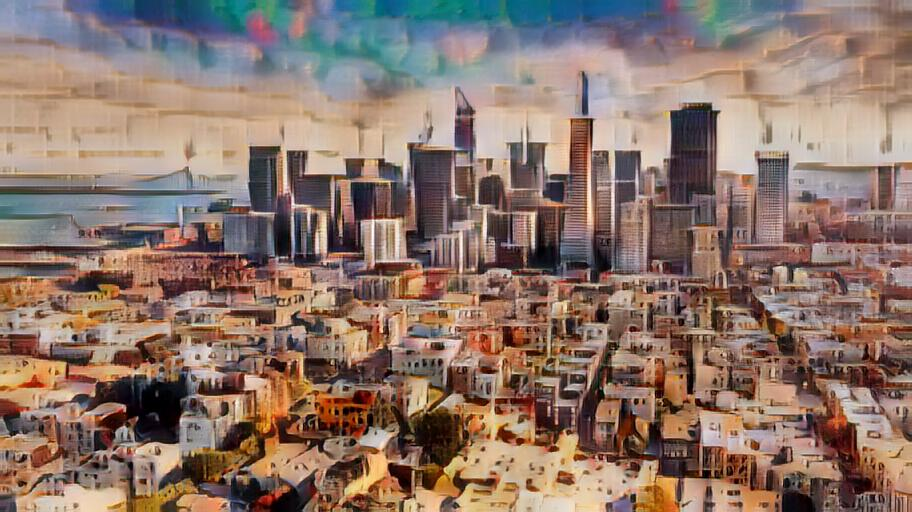

In [20]:
#output visualization
path = f'{HOME}/nst_results/content_img_stylized_style_img.jpg'
output_image = Image.open(path)
output_image